In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = 'C:/Users/campus3S031/Desktop/iMBank/iM_DiGital_Banker_academy/projects/iMBank_pj1/sampled_data'
data_21 = pd.read_csv(f'{DATA_PATH}/merged_full_2021.csv')
data_22 = pd.read_csv(f'{DATA_PATH}/merged_full_2022.csv')
data_23 = pd.read_csv(f'{DATA_PATH}/merged_full_2023.csv')


In [3]:
print(data_21.shape, data_22.shape, data_23.shape)

(4154464, 19) (4328770, 19) (4497954, 19)


In [4]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 우수고객 수 조회
- 충성고객이란 카드 사용 기록도 있으면서 동시에 수신 기록도 있는 사람들
- 이 사람들은 iM뱅크와의 연결을 끊지는 않을 것이다!
- 즉, 두 테이블을 합친 데이터에서 NaN이 없어야 한다!

In [5]:
# 우수고객 수 -> 우상향...이긴 하다.

tmp_21 = data_21.dropna()
tmp_22 = data_22.dropna()
tmp_23 = data_23.dropna()
print(tmp_21.shape, tmp_22.shape, tmp_23.shape)

(1732483, 19) (1801626, 19) (1854082, 19)


In [6]:
tmp_21['연령대'].value_counts()

연령대
50대      405989
40대      371858
20대      332479
60대이상    277538
30대      268588
10대미만     76031
Name: count, dtype: int64

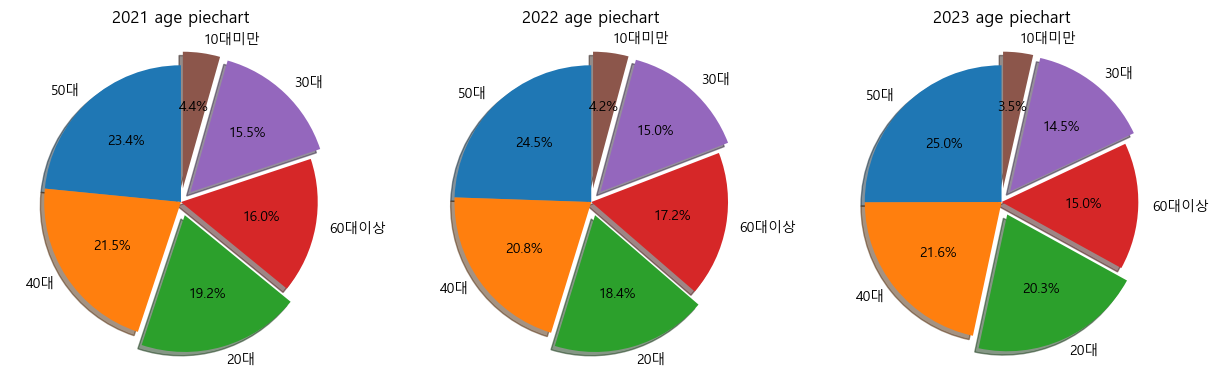

In [7]:
def make_pie_chart(df_list):

    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    explode = (0,0,0.1,0,0.1,0.1)

    for i, df in enumerate(df_list):
        age_counts = df['연령대'].value_counts()
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        ax[i].pie(sizes,
           labels = labels,
           explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} age piechart")

    plt.show()

In [ ]:
data_list = [tmp_21, tmp_22, tmp_23]

make_pie_chart(data_list)

## MZ 조회 및 연령대 시각화
- MZ는 10대, 20대, 30대를 포함한다.
- '문제 선정' 파트에 사용 가능할 것 같다
- MZ 확보가 절실함

In [8]:
tmp_21 = data_21[data_21['연령대'].isin(['20대','30대'])]
tmp_22 = data_22[data_22['연령대'].isin(['20대','30대'])]
tmp_23 = data_23[data_23['연령대'].isin(['20대','30대'])]

print(f'{tmp_21['연령대'].value_counts()} \n ----------- \n {tmp_22['연령대'].value_counts()} \n ------------ \n {tmp_23['연령대'].value_counts()}')

연령대
20대    432090
30대    374592
Name: count, dtype: int64 
 ----------- 
 연령대
20대    419078
30대    383233
Name: count, dtype: int64 
 ------------ 
 연령대
20대    405634
30대    395841
Name: count, dtype: int64


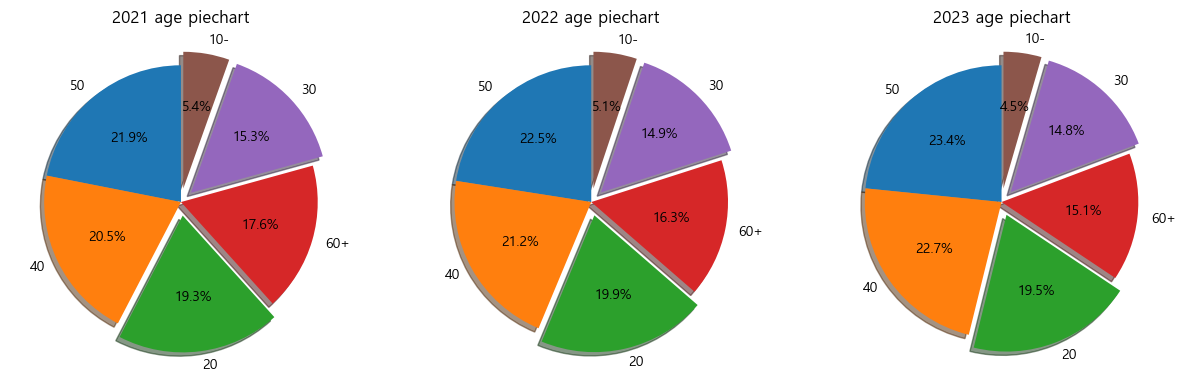

In [9]:
explode = (0,0,0.1,0,0.1,0.1)

fig, ax = plt.subplots(1,3,figsize = (15,5))

labels = ['50', '40', '20', '60+', '30', '10-']
ax[0].pie(data_21['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[0].set_title("2021 age piechart")

ax[1].pie(data_22['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[1].set_title("2022 age piechart")

ax[2].pie(data_23['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[2].set_title("2023 age piechart")

plt.show()

# 음식업 시각화
- 왜 음식업을 주제로 잡았는가? 에 대한 대답
- 실제로 MZ세대에 음식업이 의미가 있어야 한다.

In [10]:
tmp_21.head(3)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,기준년월,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
2,NaN,2800792751,NaN,NaN,NaN,NaN,NaN,202112.0,30대,남,일반등급,울산광역시,울주군,0.0,0.0,0.0,0.0,0.0,0.0
10,NaN,2801199330,NaN,NaN,NaN,NaN,NaN,202112.0,30대,남,일반등급,서울특별시,송파구,0.0,0.0,0.0,0.0,0.0,100000.0
11,NaN,2801316597,NaN,NaN,NaN,NaN,NaN,202112.0,20대,남,일반등급,서울특별시,강동구,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 각 연도별 20~30대 카드 사용 중 상위 10개 항목 추출

v_data_21 = pd.DataFrame(tmp_21['가맹점업종명'].value_counts().head(10))
v_data_22 = pd.DataFrame(tmp_22['가맹점업종명'].value_counts().head(10))
v_data_23 = pd.DataFrame(tmp_23['가맹점업종명'].value_counts().head(10))

In [12]:
# 시각화를 위한 데이터 전처리
v_data_all = pd.concat([v_data_21, v_data_22, v_data_23], axis = 1)
v_data_all.columns = [2021,2022,2023]
#v_data_all = v_data_all.reset_index()

v_data_all = v_data_all.div(v_data_all.sum(axis=0), axis = 1).fillna(0)
v_data_all

,2021,2022,2023
가맹점업종명,,,
인터넷P/G,0.199197,0.201459,0.188536
일반한식,0.186288,0.182560,0.182476
편 의 점,0.171373,0.177274,0.181168
서양음식,0.164346,0.175622,0.177739
슈퍼마켓,0.090576,0.083225,0.076004
택시,0.041907,0.039719,0.040130
스넥,0.040137,0.038742,0.037311
인터넷종합Mall,0.037650,0.000000,0.041930
대형할인점,0.034359,0.000000,0.000000


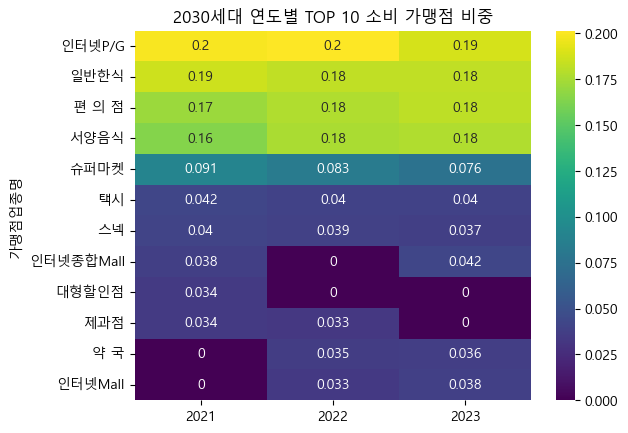

In [13]:
fig, ax = plt.subplots()
sns.heatmap(v_data_all, annot=True, 
            cmap="viridis").set_title('2030세대 연도별 TOP 10 소비 가맹점 비중')

plt.show()

# 비교군 4050 세대 시각화
- 2030세대와 차이점이 있는지?
- 있다면, 어떤 요인으로 인해 차이가 났는지?
- 여기서 통계기법을 사용할 수 있지 않을까?
    - 두 집단 비교

In [14]:
tmp_21_2 = data_21[data_21['연령대'].isin(['40대','50대'])]
tmp_22_2 = data_22[data_22['연령대'].isin(['40대','50대'])]
tmp_23_2 = data_23[data_23['연령대'].isin(['40대','50대'])]

In [15]:
# 각 연도별 40~50대 카드 사용 중 상위 10개 항목 추출

v_data_21_2 = pd.DataFrame(tmp_21_2['가맹점업종명'].value_counts().head(10))
v_data_22_2 = pd.DataFrame(tmp_22_2['가맹점업종명'].value_counts().head(10))
v_data_23_2 = pd.DataFrame(tmp_23_2['가맹점업종명'].value_counts().head(10))

In [16]:
# 시각화를 위한 데이터 전처리
v_data_all_2 = pd.concat([v_data_21_2, v_data_22_2, v_data_23_2], axis = 1)
v_data_all_2.columns = [2021,2022,2023]
#v_data_all = v_data_all.reset_index()

v_data_all_2 = v_data_all_2.div(v_data_all_2.sum(axis=0), axis = 1).fillna(0)
v_data_all_2

,2021,2022,2023
가맹점업종명,,,
일반한식,0.256906,0.256611,0.254668
슈퍼마켓,0.159623,0.144146,0.135150
편 의 점,0.119441,0.126824,0.133825
인터넷P/G,0.118046,0.121292,0.122407
서양음식,0.103181,0.116484,0.124983
약 국,0.058737,0.063039,0.062600
대형할인점,0.054671,0.048374,0.042453
스넥,0.045619,0.045236,0.046145
제과점,0.042048,0.039738,0.037833


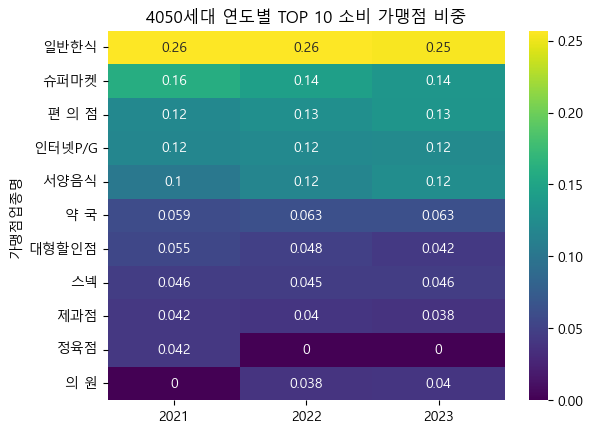

In [17]:
fig, ax = plt.subplots()
sns.heatmap(v_data_all_2, annot=True, 
            cmap="viridis").set_title('4050세대 연도별 TOP 10 소비 가맹점 비중')

plt.show()

# 식생활 소비 기준 및 해당 데이터 전처리
- '식생활 소비'로 분류 될 수 있는 가맹점 결재 
- 이후 하위 요식업으로 분류 할 수 있는지 알아보기

In [18]:
# '식생활소비' 로 분류될 수 있는 칼럼들
# 언제든지 수정 가능
# 상위 10% 이하는 조금 무의미한 모습을 보여준다 -> 하나로 통일?

food_market = [
    '일반한식',
    '슈퍼마켓',
    '편 의 점',
    '서양음식',
    '스넥',
    '제과점',
    '정육점',
    '농·축·수산품',
    '중국식',
    '기타음료식품',
    '일식·회집',
    '주점',
    '유흥주점',
    '단란주점',
    '농축수산가공품',
    '칵테일바',
    '주류판매점',
    '갈비전문점',
    '한정식'
    ]

In [19]:
# 나이대별로 구분해서 식생활 소비 관련 데이터 추출및 저장

dietary_consumption_2030_21 = tmp_21[tmp_21['가맹점업종명'].isin(food_market)]
dietary_consumption_2030_22 = tmp_22[tmp_22['가맹점업종명'].isin(food_market)]
dietary_consumption_2030_23 = tmp_23[tmp_23['가맹점업종명'].isin(food_market)]

dietary_consumption_4050_21 = tmp_21_2[tmp_21_2['가맹점업종명'].isin(food_market)]
dietary_consumption_4050_22 = tmp_22_2[tmp_22_2['가맹점업종명'].isin(food_market)]
dietary_consumption_4050_23 = tmp_23_2[tmp_23_2['가맹점업종명'].isin(food_market)]

data_list_2030 = [dietary_consumption_2030_21, dietary_consumption_2030_22, dietary_consumption_2030_23]
data_list_4050 = [dietary_consumption_4050_21, dietary_consumption_4050_22, dietary_consumption_4050_23]


In [20]:
# 데이터가 너무 많아서 난잡함 -> 연도 구분 칼럼만 남기고 합쳐주자

dietary_consumption_2030_21['year'] = 2021
dietary_consumption_2030_22['year'] = 2022
dietary_consumption_2030_23['year'] = 2023

dietary_consumption_4050_21['year'] = 2021
dietary_consumption_4050_22['year'] = 2022
dietary_consumption_4050_23['year'] = 2023

dietary_consumption_2030 = pd.concat([dietary_consumption_2030_21,dietary_consumption_2030_22,dietary_consumption_2030_23], axis = 0)
dietary_consumption_4050 = pd.concat([dietary_consumption_4050_21,dietary_consumption_4050_22,dietary_consumption_4050_23], axis = 0)

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_12028\1559513474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dietary_consumption_2030_21['year'] = 2021
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_12028\1559513474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dietary_consumption_2030_22['year'] = 2022
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_12028\1559513474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

### 데이터 저장 - 식습관 건수만

In [21]:
def save_modified_data(df_list_2030, df_list_4050):
    
    file_names_2030 = [
        "dietary_consumption_2030_21.csv",
        "dietary_consumption_2030_22.csv",
        "dietary_consumption_2030_23.csv"
    ]

    file_names_4050 = [
        "dietary_consumption_4050_21.csv",
        "dietary_consumption_4050_22.csv",
        "dietary_consumption_4050_23.csv"
    ]


    for df, name in zip(df_list_2030, file_names_2030):
        df.to_csv(f"sampled_data/{name}", index = False)
        print(f"Saved {name}")

    for df, name in zip(df_list_4050, file_names_4050):
        df.to_csv(f"sampled_data/{name}", index = False)
        print(f"Saved {name}")
    print('------Finished-------')

save_modified_data(data_list_2030, data_list_4050)

Saved dietary_consumption_2030_21.csv
Saved dietary_consumption_2030_22.csv
Saved dietary_consumption_2030_23.csv
Saved dietary_consumption_4050_21.csv
Saved dietary_consumption_4050_22.csv
Saved dietary_consumption_4050_23.csv
------Finished-------


In [22]:
dietary_consumption_2030.to_csv(f"sampled_data/dietary_consumption_2030.csv", index = False)
dietary_consumption_4050.to_csv(f"sampled_data/dietary_consumption_4050.csv", index = False)
print(f"---------Saved complete--------")

---------Saved complete--------


In [23]:
dietary_consumption_2030.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908571 entries, 370 to 4496353
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래년월      908571 non-null  float64
 1   고객ID      908571 non-null  int64  
 2   가맹점업종명    908571 non-null  object 
 3   가맹점_광역시도  908571 non-null  object 
 4   가맹점_시군구   907917 non-null  object 
 5   승인건수      908571 non-null  object 
 6   승인금액      908571 non-null  float64
 7   기준년월      908571 non-null  float64
 8   연령대       908571 non-null  object 
 9   성별        908571 non-null  object 
 10  고객등급      908571 non-null  object 
 11  자택_시도     908571 non-null  object 
 12  자택_시군구    908571 non-null  object 
 13  수신_요구불예금  908571 non-null  float64
 14  수신_거치식예금  908571 non-null  float64
 15  수신_적립식예금  908571 non-null  float64
 16  수신_펀드     908571 non-null  float64
 17  수신_외화예금   908571 non-null  float64
 18  대출금액      908571 non-null  float64
 19  year      908571 non-null  int64  
dtypes: flo

# 시각화


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_12028\358553804.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = dietary_consumption_2030_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[0]).set_title("2030사용자 가맹점 업종 기준 승인 금액 평균 2021")
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_12028\358553804.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = dietary_consumption_4050_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[1]).set_title("4050사용자 가맹점 업종 기준 승인 금액 평균 2021")


<function matplotlib.pyplot.show(close=None, block=None)>

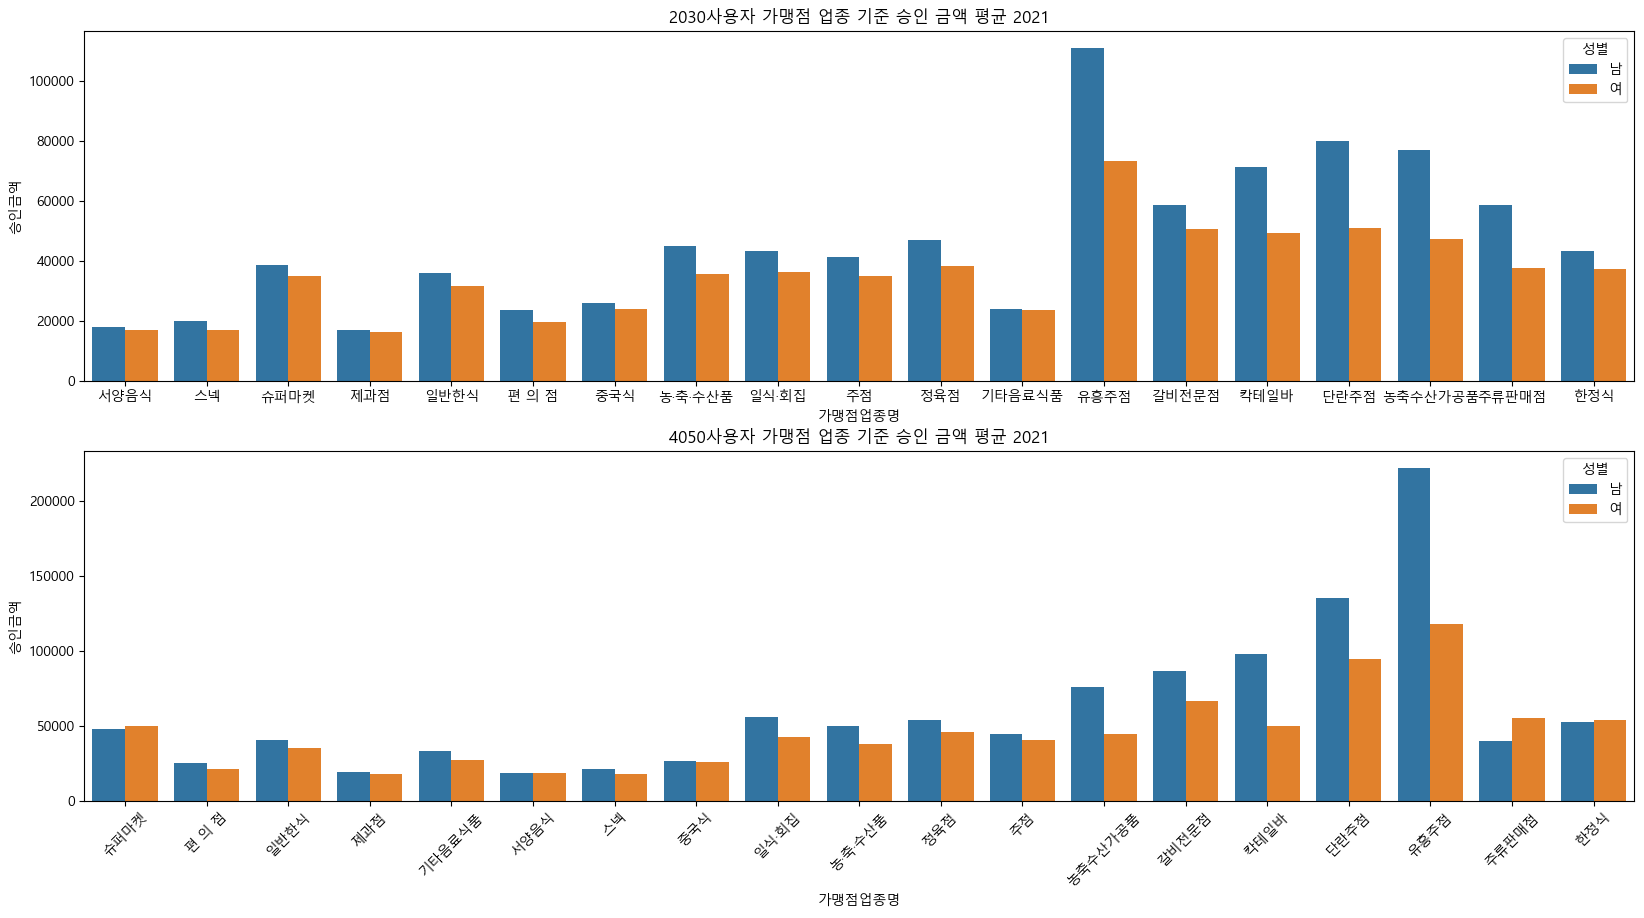

In [24]:
fig, ax = plt.subplots(2,1,figsize = (20,10))

sns.barplot(data = dietary_consumption_2030_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[0]).set_title("2030사용자 가맹점 업종 기준 승인 금액 평균 2021")
plt.xticks(rotation = 45)

sns.barplot(data = dietary_consumption_4050_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[1]).set_title("4050사용자 가맹점 업종 기준 승인 금액 평균 2021")
plt.xticks(rotation = 45)

plt.show

### Butterfly Chart를 써보자

In [25]:
# 소비 횟수 시각화용 데이터 생성

count_data_2030_21 = dietary_consumption_2030_21.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)
count_data_4050_21 = dietary_consumption_4050_21.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

count_data_2030_22 = dietary_consumption_2030_22.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)
count_data_4050_22 = dietary_consumption_4050_22.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

count_data_2030_23 = dietary_consumption_2030_23.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)
count_data_4050_23 = dietary_consumption_4050_23.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

In [26]:
# Butterfly Plot 그리기 함수

def set_butterfly_foodcount(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 식습관 소비 횟수 비교", fontsize=17)
    plt.show()


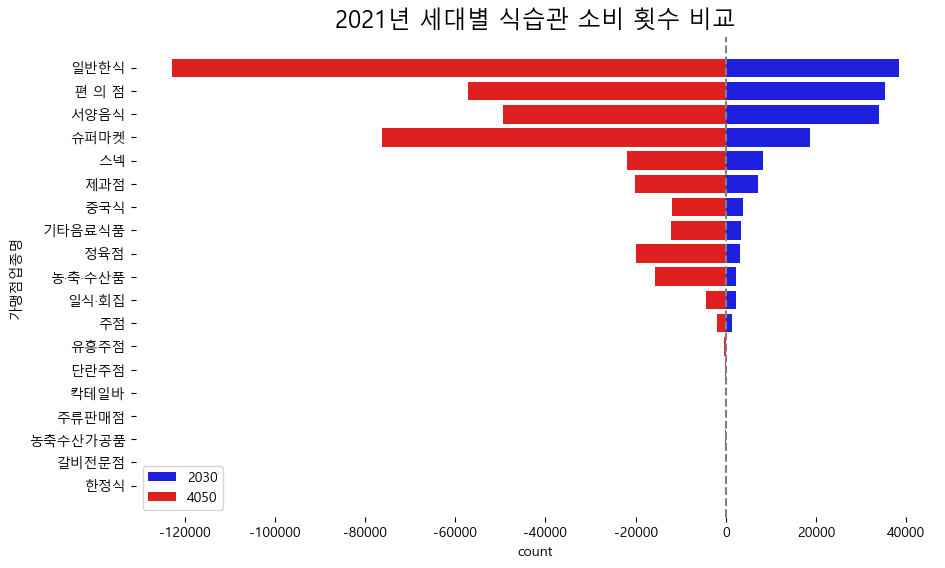

In [27]:
set_butterfly_foodcount(count_data_2030_21, count_data_4050_21, 2021)

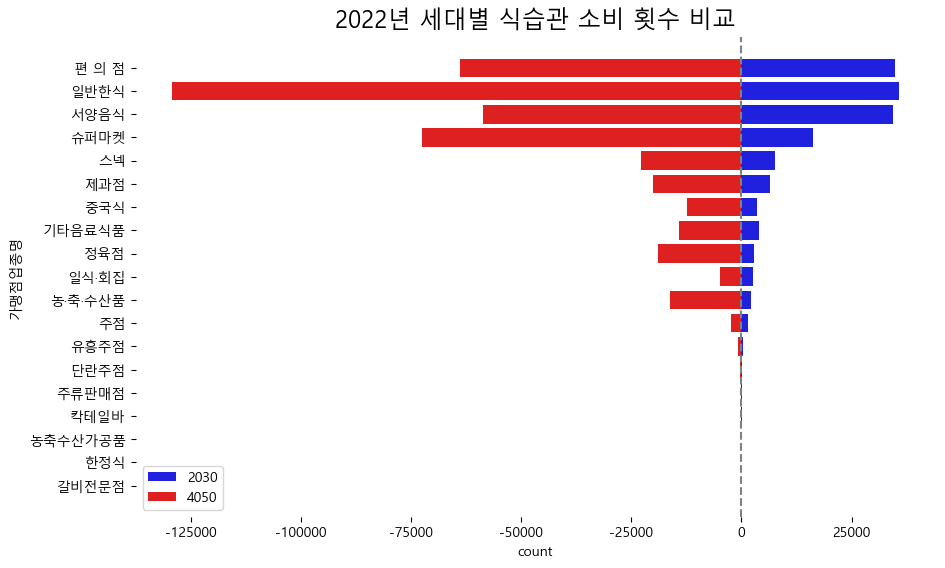

In [28]:
set_butterfly_foodcount(count_data_2030_22, count_data_4050_22, 2022)

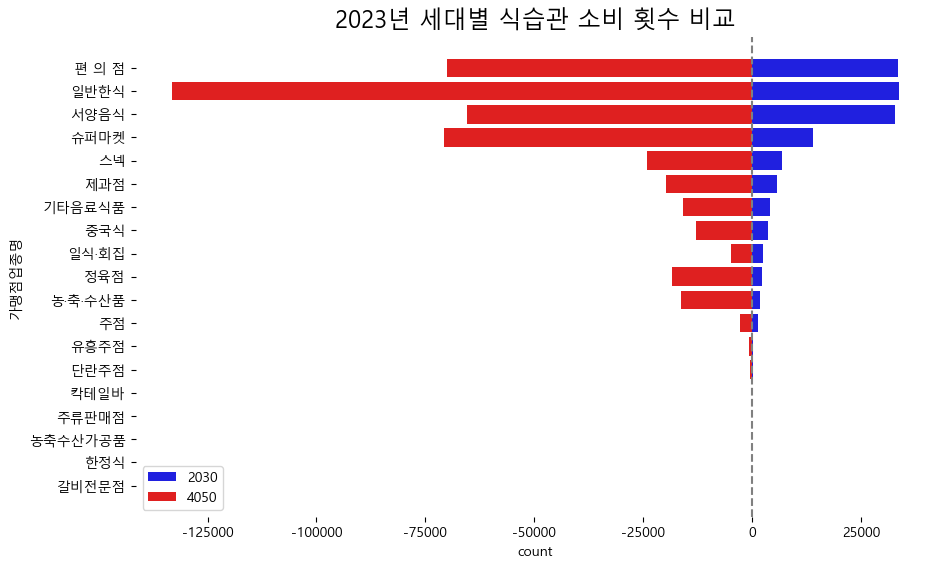

In [29]:
set_butterfly_foodcount(count_data_2030_23, count_data_4050_23, 2023)

# 데이터 추가 핸들링
- 변수 변환
    - 승인 건수 수치화
    - 기준년월, 거래년월 Datetime으로
    - 시계열 데이터에 일자가 없어서 일자는 모두 1일로 고정

In [31]:
'''
dietary_consumption_2030 = pd.read_csv('sampled_data/dietary_consumption_2030.csv')
dietary_consumption_4050 = pd.read_csv('sampled_data/dietary_consumption_4050.csv')
'''

In [32]:
'''
# 매핑 딕셔너리 생성
mapping = {
    '5번이하': 1,
    '5번초과 10번이하': 2,
    '10번초과 15번이하': 3,
    '15번초과 20번이하': 4,
    '20번 초과': 5
}

# 특정 칼럼을 수치화 해주는 함수 - 쓰려면 매핑 수정 필수적!!
def cartegory_to_int_columns(df, colname, map = mapping):
    df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)
    print('수치화 완료')

cartegory_to_int_columns(dietary_consumption_2030, '승인건수')
cartegory_to_int_columns(dietary_consumption_4050, '승인건수')
'''


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_12028\553808149.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)


수치화 완료
수치화 완료


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_12028\553808149.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)


In [33]:
'''
# Datetime으로 만들어주는 코드

def datetime_quater(df, colname):

    for i in colname:
        df[i] = pd.to_datetime(df[i].astype(int).astype(str), format = '%Y%m')
        df[f'{i}_분기'] = df[i].dt.quarter
        print(f'{i}의 타입은: {df[i].dtype}')
        print(f'{i}_분기 생성됨!')

datetime_quater(dietary_consumption_2030, ['기준년월', '거래년월'])
datetime_quater(dietary_consumption_4050, ['기준년월', '거래년월'])
'''

기준년월의 타입은: datetime64[ns]
기준년월_분기 생성됨!
거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!
기준년월의 타입은: datetime64[ns]
기준년월_분기 생성됨!
거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!


In [34]:
'''
dietary_consumption_4050.to_csv(f"sampled_data/dietary_consumption_4050.csv", index = False)
dietary_consumption_2030.to_csv(f"sampled_data/dietary_consumption_2030.csv", index = False)
'''

# 통계학을 기반으로 한 진짜진짜 간단한 시각화
- 캐글 데이터 비슷한거 

표준화된 값으로, 이를 통해 서로 다른 표본 수를 가진 집단 간의 비교가 용이해집니다. 값이 0에 가까운 경우는 평균에 가까운 값을 의미하고, 양수는 평균보다 큰 값을, 음수는 평균보다 작은 값을 의미합니다. 이를 통해 데이터의 상대적인 위치를 평가할 수 있습니다.

In [35]:
def standardize_crosstab(crosstab):
    # 각 열에 대해 표준화
    standardized = (crosstab - crosstab.mean()) / crosstab.std()
    return standardized

In [36]:
cross1 = pd.crosstab(index = [dietary_consumption_2030['승인건수_수치화'], dietary_consumption_2030['가맹점업종명']], columns = dietary_consumption_2030['연령대'])
cross2 = pd.crosstab(index = [dietary_consumption_4050['승인건수_수치화'], dietary_consumption_4050['가맹점업종명']], columns = dietary_consumption_4050['연령대'])
cross = pd.concat([cross1, cross2], axis = 1).fillna(0)

cross_norm = standardize_crosstab(cross).reset_index()
cross = cross.reset_index().iloc[:-4]


In [ ]:
cross

In [ ]:
cross_norm

In [39]:
dietary_consumption_2030

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,기준년월,연령대,성별,...,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액,year,승인건수_수치화,기준년월_분기,거래년월_분기
0,2021-12-01,2817486472,서양음식,대구광역시,남구,5번이하,40000.0,2021-11-01,20대,남,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,1,4,4
1,2021-11-01,2822606023,스넥,경상북도,경산시,5번이하,40000.0,2021-11-01,20대,남,...,100000.0,0.0,0.0,0.0,0.0,0.0,2021,1,4,4
2,2021-12-01,2823316253,슈퍼마켓,경상북도,경산시,5번초과 10번이하,60000.0,2021-11-01,20대,여,...,200000.0,0.0,0.0,0.0,0.0,0.0,2021,2,4,4
3,2021-12-01,2823316253,제과점,경상북도,경산시,5번이하,20000.0,2021-11-01,20대,여,...,200000.0,0.0,0.0,0.0,0.0,0.0,2021,1,4,4
4,2021-12-01,2824549363,일반한식,대구광역시,달서구,5번이하,50000.0,2021-12-01,20대,남,...,200000.0,0.0,0.0,0.0,0.0,0.0,2021,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908566,2023-10-01,9996482981,제과점,대구광역시,북구,5번이하,10000.0,2023-07-01,30대,남,...,2100000.0,0.0,0.0,0.0,0.0,7100000.0,2023,1,3,4
908567,2023-12-01,9996482981,일반한식,대구광역시,동구,5번이하,40000.0,2023-06-01,30대,남,...,1200000.0,0.0,0.0,0.0,0.0,4700000.0,2023,1,2,4
908568,2023-12-01,9996482981,일반한식,대구광역시,동구,5번이하,40000.0,2023-07-01,30대,남,...,2100000.0,0.0,0.0,0.0,0.0,7100000.0,2023,1,3,4
908569,2023-12-01,9996482981,일반한식,울산광역시,울주군,5번이하,20000.0,2023-06-01,30대,남,...,1200000.0,0.0,0.0,0.0,0.0,4700000.0,2023,1,2,4


In [49]:
dietary_consumption_2030['고객ID'].value_counts()

고객ID
5111865089    145
4438169383    141
4776775987    137
8077145363    127
7279407911    124
             ... 
3403770087      1
3402966645      1
3402097844      1
3409321903      1
3408742070      1
Name: count, Length: 123281, dtype: int64

In [52]:
dietary_consumption_2030[dietary_consumption_2030['고객ID'] == 5111865089].tail(15)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,기준년월,연령대,성별,...,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액,year,승인건수_수치화,기준년월_분기,거래년월_분기
477143,2022-11-01,5111865089,스넥,경기도,오산시,5번이하,20000.0,2022-02-01,20대,여,...,300000.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,4
477144,2022-11-01,5111865089,스넥,경기도,오산시,5번이하,20000.0,2022-04-01,20대,여,...,500000.0,0.0,0.0,0.0,0.0,0.0,2022,1,2,4
477145,2022-11-01,5111865089,스넥,경기도,오산시,5번이하,20000.0,2022-11-01,20대,여,...,300000.0,0.0,0.0,0.0,0.0,0.0,2022,1,4,4
477146,2022-11-01,5111865089,일반한식,대구광역시,동구,5번이하,30000.0,2022-02-01,20대,여,...,300000.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,4
477147,2022-11-01,5111865089,일반한식,대구광역시,동구,5번이하,30000.0,2022-04-01,20대,여,...,500000.0,0.0,0.0,0.0,0.0,0.0,2022,1,2,4
477148,2022-11-01,5111865089,일반한식,대구광역시,동구,5번이하,30000.0,2022-11-01,20대,여,...,300000.0,0.0,0.0,0.0,0.0,0.0,2022,1,4,4
477149,2022-11-01,5111865089,편 의 점,대구광역시,중구,5번이하,10000.0,2022-02-01,20대,여,...,300000.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,4
477150,2022-11-01,5111865089,편 의 점,대구광역시,중구,5번이하,10000.0,2022-04-01,20대,여,...,500000.0,0.0,0.0,0.0,0.0,0.0,2022,1,2,4
477151,2022-11-01,5111865089,편 의 점,대구광역시,중구,5번이하,10000.0,2022-11-01,20대,여,...,300000.0,0.0,0.0,0.0,0.0,0.0,2022,1,4,4
477152,2022-12-01,5111865089,농·축·수산품,경기도,화성시,5번이하,80000.0,2022-02-01,20대,여,...,300000.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,4


# 파생변수 만들기
- 필요하긴 할듯

# T-test 쌍체분석
- 2030 세대와 4050세대의 소비 패턴에 유의미한 차이가 있는가?
- 횟수 와 금액으로 나누어 차이가 있는지 봐야 한다.